In [1]:
# Step 1.1: Upload the dataset
from google.colab import files  # Use this if you're on Google Colab

uploaded = files.upload()


Saving Mall Customer Segmentation.csv.zip to Mall Customer Segmentation.csv.zip


In [2]:
# Step 1.2: Read the uploaded CSV file
import pandas as pd

# Replace 'your_dataset.csv' with the actual filename
df = pd.read_csv('Mall Customer Segmentation.csv.zip')

# Step 1.3: View basic info and head
print("Shape of the dataset:", df.shape)
df.head()


Shape of the dataset: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Check for missing values and data types
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [4]:
from sklearn.preprocessing import StandardScaler

# Exclude non-numeric columns if any
numerical_df = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)


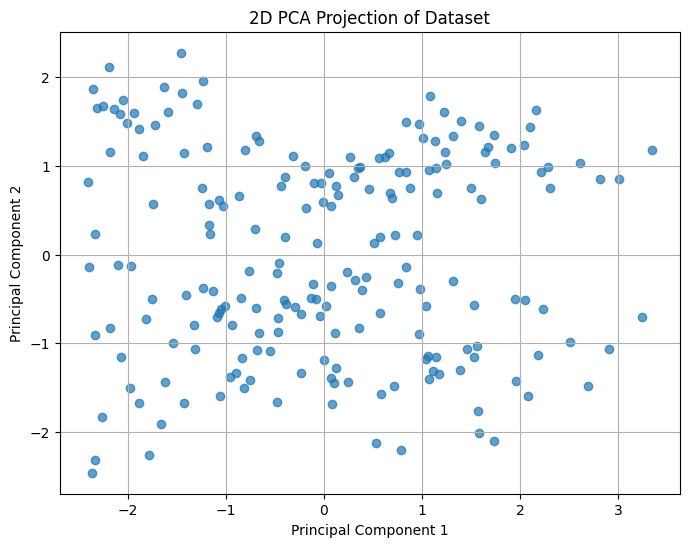

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 principal components for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Visualize PCA results
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection of Dataset')
plt.grid(True)
plt.show()


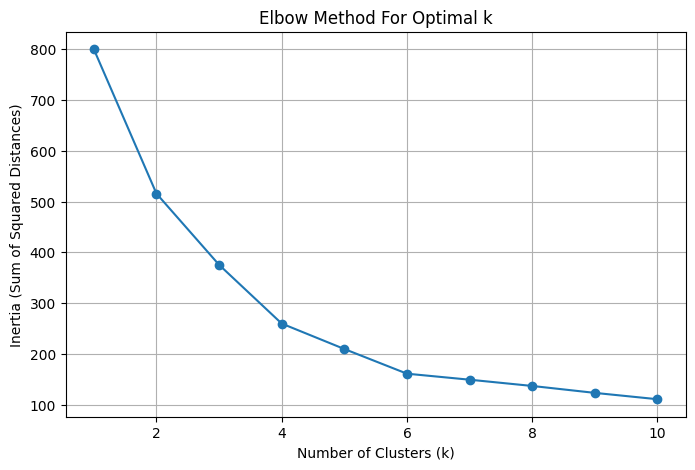

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use scaled_data from previous step
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [7]:
# Choose k based on elbow method
optimal_k = 3  # Replace this with the elbow point you observe

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Assign cluster labels
df['Cluster'] = kmeans.labels_


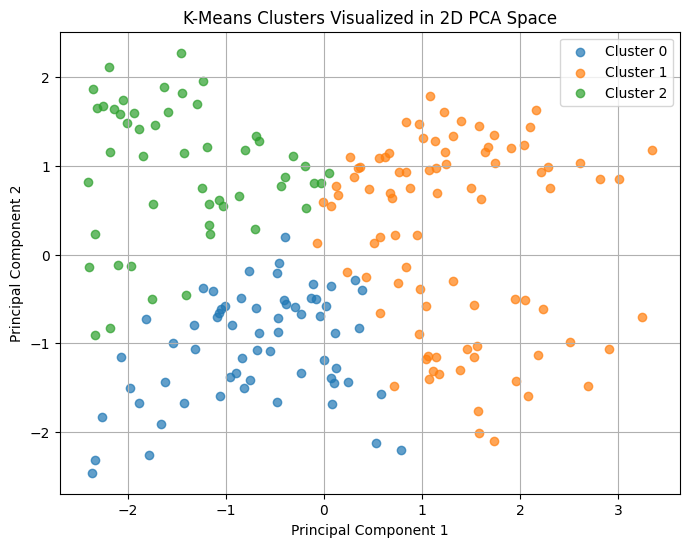

In [8]:
# Visualize clusters using previously computed PCA
pca_df['Cluster'] = df['Cluster']

plt.figure(figsize=(8,6))
for cluster in range(optimal_k):
    clustered_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(clustered_data['PC1'], clustered_data['PC2'], label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters Visualized in 2D PCA Space')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score for k={optimal_k}: {score:.3f}")


Silhouette Score for k=3: 0.337


In [10]:
!pip install kneed  # Run only once in Colab/Jupyter

from kneed import KneeLocator

knee = KneeLocator(K, inertia, curve='convex', direction='decreasing')
optimal_k = knee.knee
print(f"Optimal number of clusters according to Elbow/Knee method: {optimal_k}")


Optimal number of clusters according to Elbow/Knee method: 4


In [12]:
# Final KMeans fitting with optimal K (auto-detected)
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = final_kmeans.fit_predict(scaled_data)


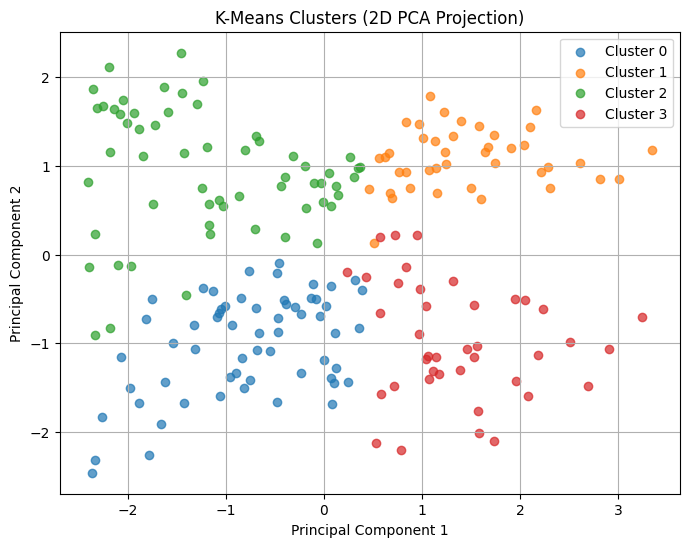

In [13]:
import matplotlib.pyplot as plt

# Make sure PCA has already been done earlier
pca_df['Cluster'] = df['Cluster']

plt.figure(figsize=(8,6))
for cluster in range(optimal_k):
    clustered_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(clustered_data['PC1'], clustered_data['PC2'], label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters (2D PCA Projection)')
plt.legend()
plt.grid(True)
plt.show()


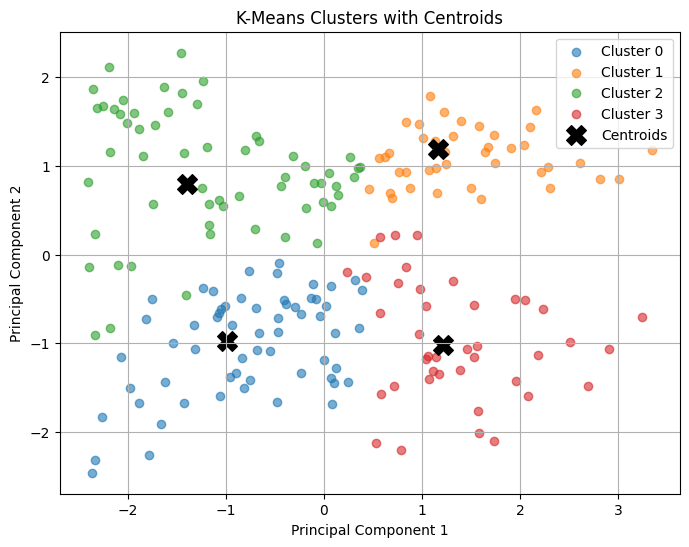

In [14]:
# Transform centroids to PCA space
pca_centroids = PCA(n_components=2).fit_transform(final_kmeans.cluster_centers_)

# Plot with centroids
plt.figure(figsize=(8,6))
for cluster in range(optimal_k):
    clustered_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(clustered_data['PC1'], clustered_data['PC2'], label=f'Cluster {cluster}', alpha=0.6)

# Plot centroids
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1],
            marker='X', s=200, c='black', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters with Centroids')
plt.legend()
plt.grid(True)
plt.show()


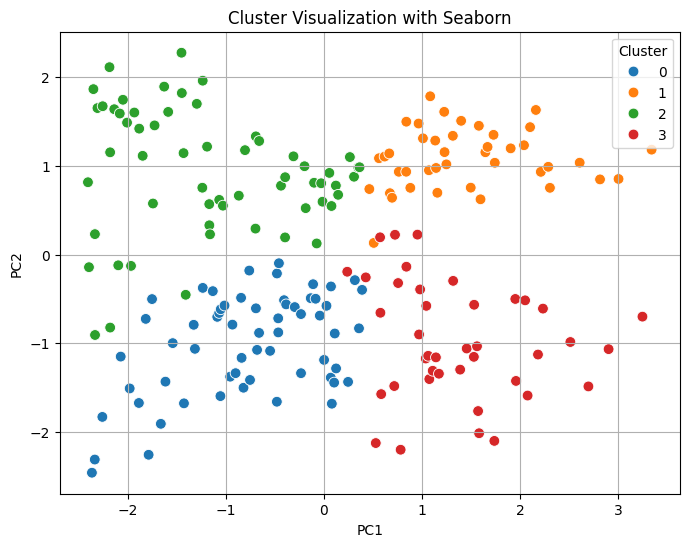

In [15]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title("Cluster Visualization with Seaborn")
plt.grid(True)
plt.show()


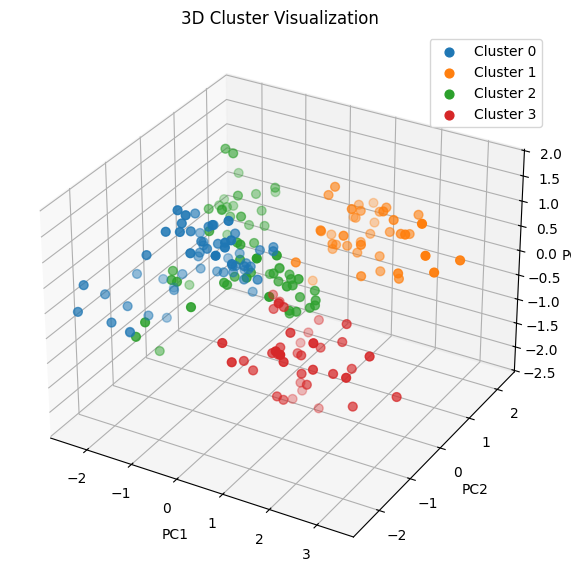

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Recompute PCA for 3 components
pca_3d = PCA(n_components=3)
pca_components_3d = pca_3d.fit_transform(scaled_data)
pca_3d_df = pd.DataFrame(data=pca_components_3d, columns=['PC1', 'PC2', 'PC3'])
pca_3d_df['Cluster'] = df['Cluster']

# 3D Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(optimal_k):
    cluster_data = pca_3d_df[pca_3d_df['Cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}', s=40)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Cluster Visualization')
ax.legend()
plt.show()


In [17]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
score = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score for k={optimal_k}: {score:.4f}")


Silhouette Score for k=4: 0.4140


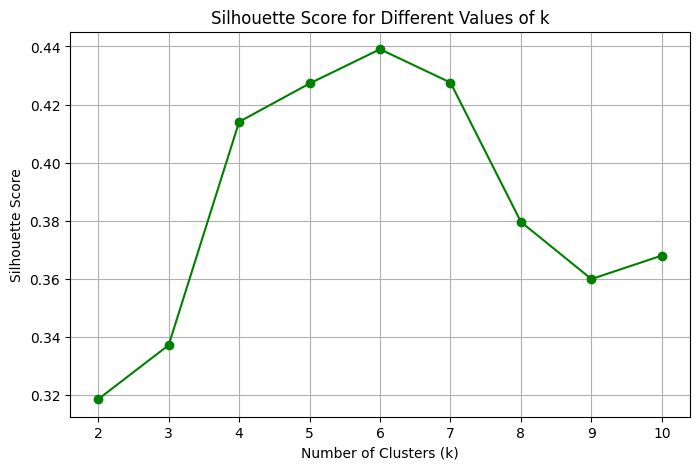

In [18]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(2,11), silhouette_scores, marker='o', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.grid(True)
plt.show()


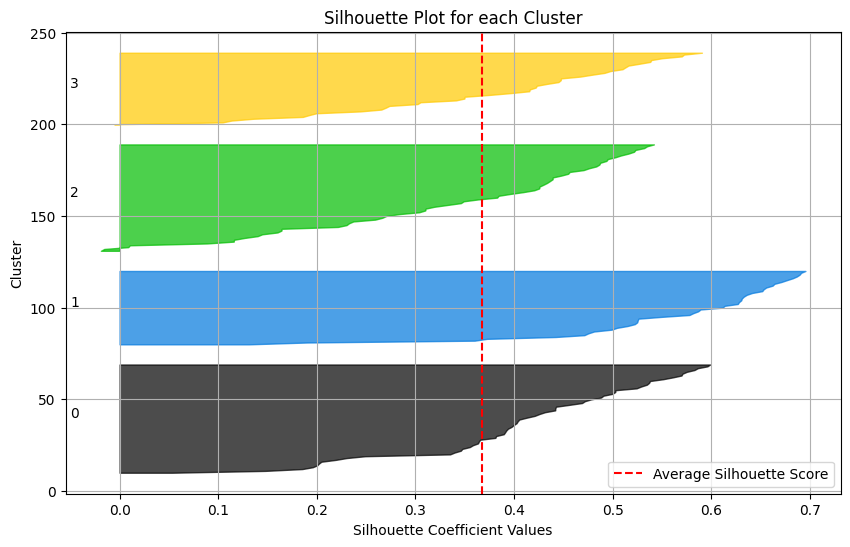

In [19]:
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

# Get sample-wise silhouette values
sample_silhouette_values = silhouette_samples(scaled_data, df['Cluster'])

y_lower = 10
plt.figure(figsize=(10,6))

for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[df['Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for space between clusters

plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster")
plt.title("Silhouette Plot for each Cluster")
plt.axvline(x=score, color="red", linestyle="--", label="Average Silhouette Score")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# Combine scaled data and cluster labels
clustered_df = pd.DataFrame(scaled_data, columns=numerical_df.columns)
clustered_df['Cluster'] = df['Cluster']

# Profile clusters
cluster_profiles = clustered_df.groupby('Cluster').mean()
print(cluster_profiles)


         CustomerID       Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                  
0         -0.539541  1.142286           -0.481953               -0.326748
1          1.031428 -0.439090            0.957066                1.191917
2         -0.864128 -0.925851           -0.831343                0.305440
3          1.026686  0.102268            0.968168               -1.182117


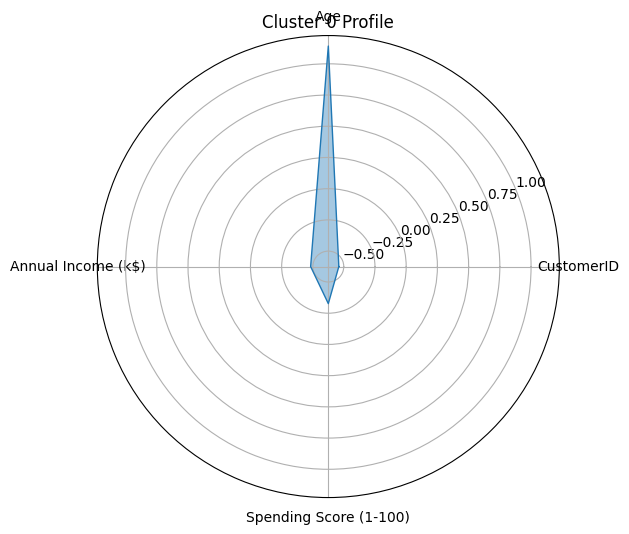

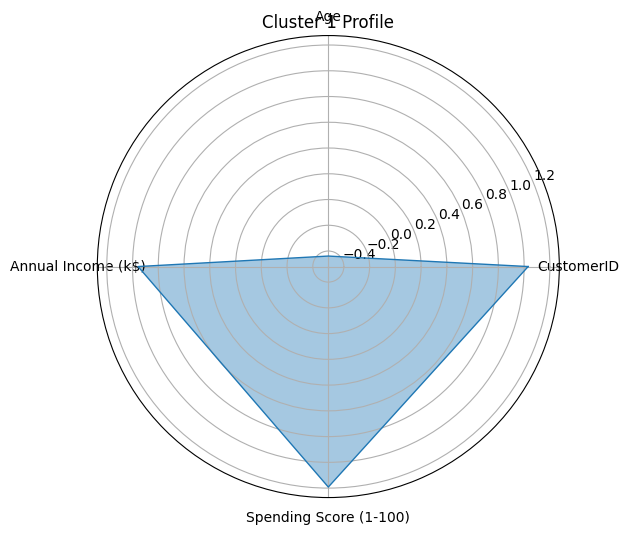

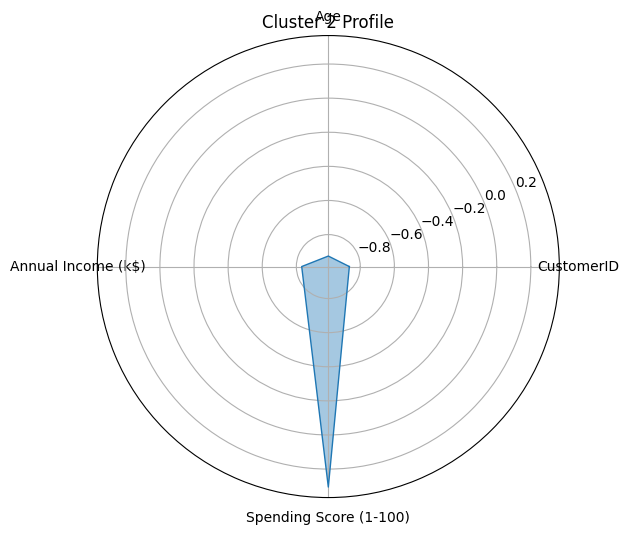

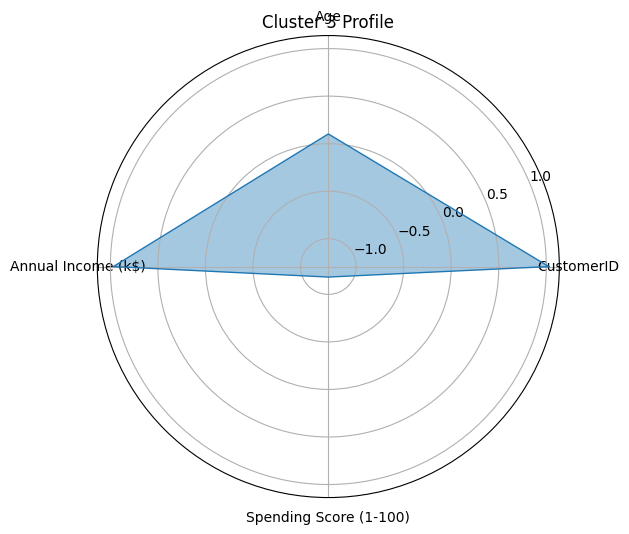

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Radar chart for 1 cluster
def plot_radar(df, cluster_n):
    categories = list(df.columns)
    values = df.loc[cluster_n].values.flatten().tolist()
    values += values[:1]  # repeat first value to close the circle

    angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
    angles += angles[:1]

    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories)
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.4)
    plt.title(f'Cluster {cluster_n} Profile')
    plt.show()

# Plot for each cluster
for c in cluster_profiles.index:
    plot_radar(cluster_profiles, c)


In [22]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg.fit_predict(scaled_data)

agg_score = silhouette_score(scaled_data, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {agg_score:.4f}")


Agglomerative Clustering Silhouette Score: 0.3923


In [23]:
# Export the clustered dataset
df.to_csv("clustered_output.csv", index=False)


In [25]:
import plotly.express as px

# Include CustomerID in pca_df for hover data
pca_df['CustomerID'] = df['CustomerID']

fig = px.scatter(pca_df, x='PC1', y='PC2', color='Cluster',
                 title='Interactive Cluster Visualization (PCA)',
                 hover_data=['CustomerID', 'PC1', 'PC2', 'Cluster'])  # Include relevant columns for hover
fig.show()